In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

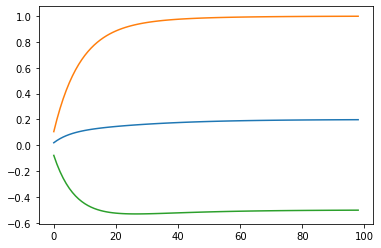

In [2]:
# Gradient descent method
df = pd.read_csv('assignment1_data.csv',header = None)
df.head()
x = df[0]
xT = x.T
y = df[1]
N = len(df)
alpha = 0.01
w = np.matrix([[0],[0],[0]])
R_x = np.matrix([[5, -1, -2],[-1, 5, -1],[-2, -1, 5]])
r_yx = np.matrix([[1],[5.3],[-3.9]])

W = np.zeros((3,N))
for i in range(1,N):
    w = w+2*alpha*(r_yx-R_x*w)
    W[:,i] = w.A1
plt.plot(W[0,1:100])
plt.plot(W[1,1:100])
plt.plot(W[2,1:100])

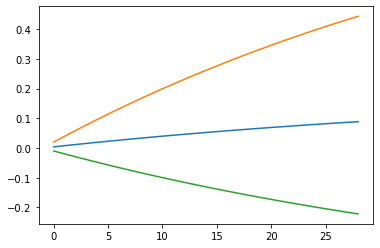

In [3]:
# Newton method
N = len(df)
alpha = 0.01
# alpha = 0.9
w = np.matrix([[0],[0],[0]])
R_x = np.matrix([[5, -1, -2],[-1, 5, -1],[-2, -1, 5]])
r_yx = np.matrix([[1],[5.3],[-3.9]])

W1 = np.zeros((3,N))
for i in range(1,N):
    w = w+2*alpha*R_x**-1*(r_yx-R_x*w)
    W1[:,i] = w.A1
plt.plot(W1[0,1:30])
plt.plot(W1[1,1:30])
plt.plot(W1[2,1:30])

In [4]:
# J = np.zeros((1,N))
# X = np.arange(-2, 2, 0.1)
# Y = np.arange(-2, 2, 0.1)
# Z = np.ones((1,len(X)))*0.5
# w = np.matrix([[X],[Y],[Z]])
# for i in range(1,N):
#     j = y[i]**2 + -w.T*r_yx - r_yx.T*w + w.T*R_x*w
#     J[:,i]= j.A1
# print(J)


# J = -w.T*r_yx - r_yx.T*w + w.T*R_x*w
# print(J)
#plt.contour(X, Y, J)

c:\users\20174295\5lsl0\venv\lib\site-packages\numpy\matrixlib\defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr = N.array(data, dtype=dtype, copy=copy)


ValueError: setting an array element with a sequence.

In [6]:

# # plt.plot(W)
# X = W[0,1:10]
# Y = W[1,1:10]
# Z = 5*np.ones((1,10))
# print(y[1])


# print(J)
# Z = np.meshgrid(X,Y)
# plt.contour(Z)
# print(Z)
# plt.plot(gradZ)
# Z = 0.5
# Z = np.meshgrid(X,Y)
# plt.contour(1,1,gradZ)
# # plt.plot(W[1,1:100])
# # plt.plot(W[2,1:100])
# plt.title('Converge w')
# plt.xlabel('N')

# plt.plot

In [12]:
# least mean squares
x = df[0]
xT = x.T
y = df[1]
N = len(df)

alpha = 0.0001
w = np.matrix([[0],[0],[0]])
W2 = np.zeros((3,N))
for i in range(2,N):
    x_bar = np.matrix([[x[i]],[x[i-1]],[x[i-2]]])
    y_pred = w.T* x_bar
    e = y[i] - y_pred
    w = w+2*alpha*x_bar*e
    W2[:,i] = w.A1 

print(w)


[[ 0.20813226]
 [ 0.99561   ]
 [-0.50858218]]


In [10]:
# Normalized least mean squares
x = df[0]
xT = x.T
y = df[1]
N = len(df)

alpha = 0.1
w = np.matrix([[0],[0],[0]])
W2 = np.zeros((3,N))
beta = 0.2
sigma2 = 0.01
for i in range(2,N):
    x_bar = np.matrix([[x[i]],[x[i-1]],[x[i-2]]])
    y_pred = w.T*x_bar
    e = y[i] - y_pred
    sigma2 = beta*sigma2+(1-beta)*(x_bar.T*x_bar)/len(w)
    w = w+2*alpha/sigma2[0,0]*x_bar*e
    W2[:,i] = w.A1 

print(w)

[[ 0.19783377]
 [ 1.13581298]
 [-0.26524561]]


In [61]:
# Recursive Least Squares
x = df[0]
xT = x.T
y = df[1]
N = len(df)

alpha = 0.001
gamma = 1-10**(-4);
delta = 100
r_yx = np.matrix([[0],[0],[0]])
w = np.matrix([[0],[0],[0]])

R_x1 = 1/delta*np.eye((len(w)))

for i in range(1,N-1):
    x_bar = np.matrix([[x[i+1]],[x[i]],[x[i-1]]])
    g = R_x1*x_bar/(gamma**2+x_bar.T*R_x1*x_bar)
    R_x1 = gamma**(-2)*(R_x1-g*x_bar.T*R_x1)
    r_yx = gamma**2*r_yx+x_bar*y[i+1]
    w = R_x1*r_yx
print(w)

[[ 0.2032406 ]
 [ 0.99426938]
 [-0.50063039]]
